In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R03_109")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [5]:
data = dataset

In [6]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [8]:
train_accuracies = []

In [10]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 1680460 samples
1680460/1680460 [==============================] - 176s 105us/sample - loss: 0.9612 - acc: 0.5388
epoch 2/100
Train on 1680460 samples
1680460/1680460 [==============================] - 177s 106us/sample - loss: 0.8807 - acc: 0.5847
epoch 3/100
Train on 1680460 samples
1680460/1680460 [==============================] - 179s 107us/sample - loss: 0.8433 - acc: 0.6058
epoch 4/100
Train on 1680460 samples
1680460/1680460 [==============================] - 176s 105us/sample - loss: 0.8212 - acc: 0.6186
epoch 5/100
Train on 1680460 samples
1680460/1680460 [==============================] - 178s 106us/sample - loss: 0.8060 - acc: 0.6271
epoch 6/100
Train on 1680460 samples
1680460/1680460 [==============================] - 178s 106us/sample - loss: 0.7949 - acc: 0.6337
epoch 7/100
Train on 1680460 samples
1680460/1680460 [==============================] - 177s 106us/sample - loss: 0.7868 - acc: 0.6380
epoch 8/100
Train on 1680460 samples
1680460/1680460 [=

In [13]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.9202
Test Accuracy: 0.5912


In [14]:
print(train_accuracies)

[0.53879654, 0.584731, 0.60583115, 0.61860263, 0.62709737, 0.63369375, 0.6379807, 0.64202183, 0.64479965, 0.6469217, 0.6488878, 0.65065104, 0.6520929, 0.65285575, 0.6540554, 0.6553527, 0.6556431, 0.65671426, 0.6563078, 0.65706533, 0.65720695, 0.65717185, 0.65757114, 0.6573075, 0.65738904, 0.6572159, 0.6571397, 0.6567315, 0.6566892, 0.6564631, 0.655536, 0.6550456, 0.6539668, 0.65354604, 0.6539638, 0.65407985, 0.6529236, 0.65285516, 0.6526332, 0.65368825, 0.651205, 0.6510598, 0.6514056, 0.6510973, 0.64933413, 0.6496126, 0.64900565, 0.6482743, 0.6496822, 0.64904964, 0.6483427, 0.64776134, 0.6450948, 0.64483297, 0.6458749, 0.6437428, 0.64329886, 0.643015, 0.6414154, 0.6410703, 0.63887566, 0.6394422, 0.639845, 0.6402426, 0.6381509, 0.634102, 0.6309457, 0.6352207, 0.6374981, 0.6367084, 0.637798, 0.636659, 0.63770634, 0.63203824, 0.6317074, 0.6342406, 0.63228285, 0.63136405, 0.6345512, 0.6337985, 0.63126403, 0.62759066, 0.62525856, 0.62132275, 0.6217684, 0.6225611, 0.6260458, 0.6234067, 0.623

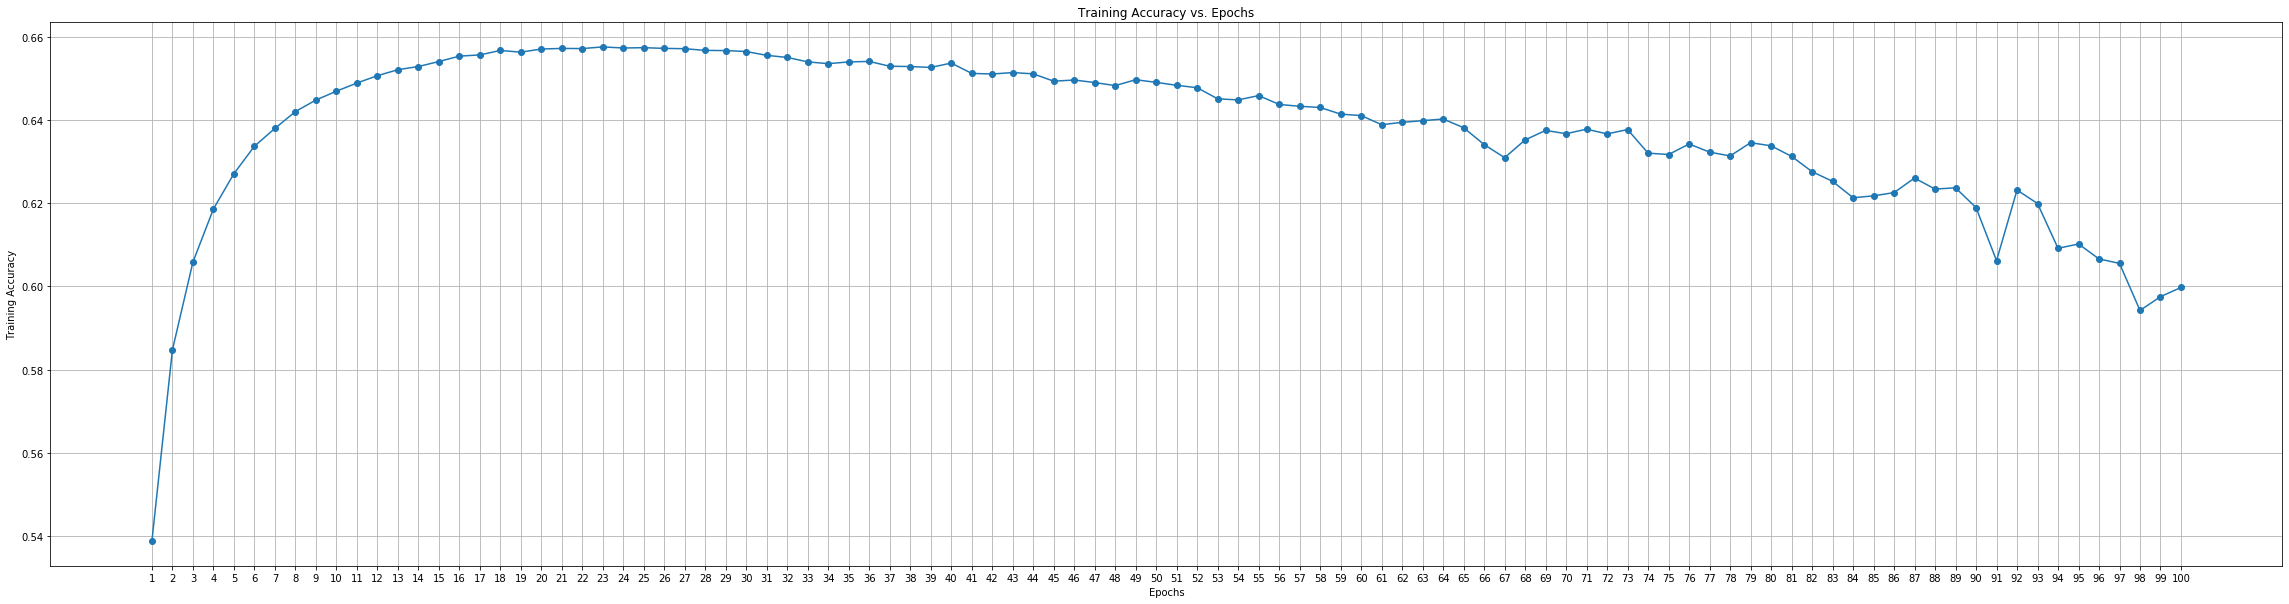

In [15]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [16]:
print(sum(train_accuracies))

63.80081081390381


In [17]:
print(max(train_accuracies))

0.65757114
